<a href="https://colab.research.google.com/github/mjmesa-mm/dsl/blob/main/ProyectoDSParteI_Mesa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Airline Passenger Satisfaction

**Archivo:** `ProyectoDSParteI_Mesa.ipynb`

**Entrega:** Avance del proyecto final — Visualizaciones y Análisis inicial.

---


Resumen

El presente proyecto analiza el dataset *Airline Passenger Satisfaction*, que son las respuestas de encuentas aplicadas a los pasajeros sobre distintos aspectos del servicio aéreo como: Wifi, comodidad del asiento, entretenimiento a bordo, puntualidad, manejo de equipaje, entre otros.
El objetivo principal es identificar qué factores son más importantes y afectab la satisfacción del pasajero y construir visualizaciones que permitan a la aerolínea mejorar su servicio.

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?resource=download





## Preguntas e hipótesis de interés

**Preguntas principales**
1. ¿Qué factores (servicio a bordo, comodidad de asiento, entretenimiento, limpieza, puntualidad, manejo de equipaje) están más asociados a la satisfacción del pasajero?  
2. ¿Influye la clase de viaje (`Class`) o el tipo de pasajero (`Customer Type`) en la satisfacción?  
3. ¿El retraso (Departure/Arrival Delay in Minutes) tiene un efecto claro sobre la probabilidad de estar insatisfecho?  
4. ¿Existen interacciones entre `Flight distance`, `Type of Travel` y la satisfacción?

**Hipótesis**
- H1: Pasajeros en clase Business tienen mayor probabilidad de estar satisfechos que en clase Eco.  
- H2: Retrasos largos en la llegada están correlacionados con mayores tasas de insatisfacción.  
- H3: Mejor puntuación en `Seat comfort`, `Leg room service` y `On-board service` se asocia con mayor satisfacción, con efectos acumulativos.  
- H4: Pasajeros en viajes de negocios muestran patrones distintos de satisfacción comparados con viajes personales.


In [3]:

# Imports y carga de datos
import pandas as pd
import numpy as np

df = pd.read_csv('/content/test.csv')
# Mostrar primeras 15 filas
df.head(15)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


**Descripción del Dataset:**

**Gender:** Género del pasajero (Femenino Female, Masculino Male).

**Customer Type:** Tipo de cliente (Loyal customer: cliente leal, Disloyal customer: cliente no leal).

**Age:** Edad actual de los pasajeros.

**Type of Travel:** Propósito del vuelo de los pasajeros (Personal Travel: viaje personal, Business Travel: viaje de negocios).

**Class:** Clase de viaje en el avión (Business, Económica, Económica Plus).

**Flight distance:** Distancia del vuelo en este trayecto.

**Inflight wifi service:** Nivel de satisfacción con el servicio de wifi a bordo (0: No aplica; 1–5).

**Departure/Arrival time convenient:** Nivel de satisfacción con la conveniencia de los horarios de salida/llegada.

**Ease of Online booking:** Nivel de satisfacción con la facilidad de la reserva en línea.

**Gate location:** Nivel de satisfacción con la ubicación de la puerta de embarque.

**Food and drink:** Nivel de satisfacción con la comida y bebida.

**Online boarding:** Nivel de satisfacción con el embarque en línea.

**Seat comfort:** Nivel de satisfacción con la comodidad del asiento.

**Inflight entertainment:** Nivel de satisfacción con el entretenimiento a bordo.

**On-board service:** Nivel de satisfacción con el servicio a bordo.

**Leg room service:** Nivel de satisfacción con el espacio para las piernas.

**Baggage handling:** Nivel de satisfacción con el manejo del equipaje.

**Check-in service:** Nivel de satisfacción con el servicio de check-in.

**Inflight service:** Nivel de satisfacción con el servicio en vuelo.

**Cleanliness:** Nivel de satisfacción con la limpieza.

**Departure Delay in Minutes:** Minutos de retraso en la salida.

**Arrival Delay in Minutes:** Minutos de retraso en la llegada.

**Satisfaction:** Nivel de satisfacción con la aerolínea (Satisfaction: satisfecho, Neutral or dissatisfaction: neutral o insatisfecho).

In [4]:

# Exploración rápida de la data
print('Dimensiones:', df.shape)
print('\nTipos de variables:')
print(df.dtypes.value_counts())
print('\nValores nulos por columna:')
print(df.isna().sum().sort_values(ascending=False).head(20))

# Estadísticas numéricas generales
df.describe(include='all').T


Dimensiones: (25976, 25)

Tipos de variables:
int64      19
object      5
float64     1
Name: count, dtype: int64

Valores nulos por columna:
Arrival Delay in Minutes             83
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Unnamed: 0                            0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Gate location                         0
Ease of Online booking                0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
Food and drink                        0
On-board service                      0
Leg room service                      0
Checkin service                       0
dtype: int64


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,25976.0,NaN,NaN,NaN,12987.5,7498.769632,0.0,6493.75,12987.5,19481.25,25975.0
id,25976.0,NaN,NaN,NaN,65005.657992,37611.526647,17.0,32170.5,65319.5,97584.25,129877.0
Gender,25976,2,Female,13172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Type,25976,2,Loyal Customer,21177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,25976.0,NaN,NaN,NaN,39.620958,15.135685,7.0,27.0,40.0,51.0,85.0
Type of Travel,25976,2,Business travel,18038,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Class,25976,3,Business,12495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight Distance,25976.0,NaN,NaN,NaN,1193.788459,998.683999,31.0,414.0,849.0,1744.0,4983.0
Inflight wifi service,25976.0,NaN,NaN,NaN,2.724746,1.335384,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,25976.0,NaN,NaN,NaN,3.046812,1.533371,0.0,2.0,3.0,4.0,5.0


### Valores faltantes
En el dataset se identifican columnas con valores faltantes. En el notebook se incluye una celda que calcula las proporciones de NA.

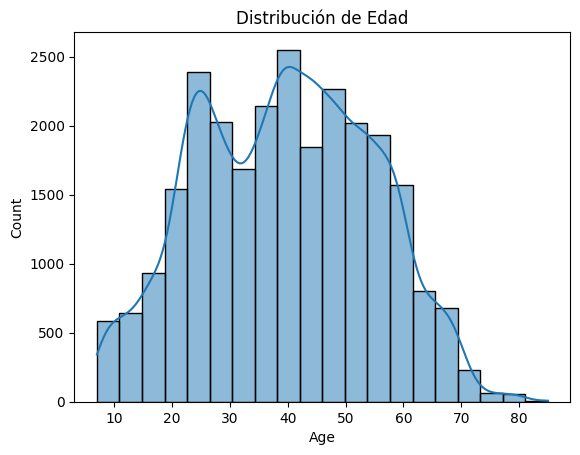

In [6]:

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Distribución por Edad
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title('Distribución de Edad')
plt.xlabel('Age')
plt.show()



La gráfica "Distribución de Edad" muestra un histograma de la variable Age, complementado con una curva de densidad.
Se observa una mayor concentración de pasajeros entre los 30 y 50 años, lo cual indica que la mayoría de los viajeros pertenecen a un rango de edad adulta. También se visualiza una menor proporción de pasajeros jóvenes y adultos mayores.


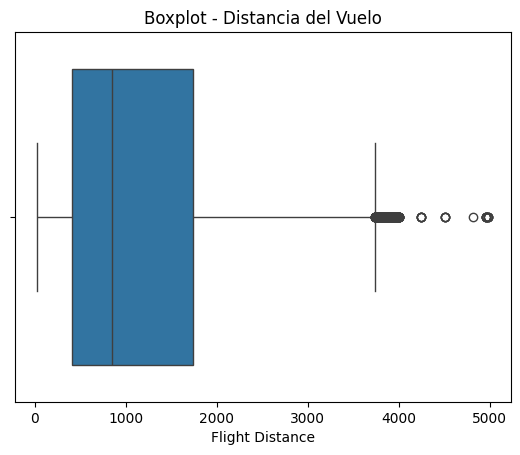


Resumen numérico de Distancia del Vuelo:


,Flight Distance
count,25976.000000
mean,1193.788459
std,998.683999
min,31.000000
25%,414.000000
50%,849.000000
75%,1744.000000
max,4983.000000


In [7]:
# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Distancia del vuelo - boxplot
sns.boxplot(x=df['Flight Distance'].dropna())
plt.title('Boxplot - Distancia del Vuelo')
plt.show()

print('\nResumen numérico de Distancia del Vuelo:')
display(df['Flight Distance'].describe())


El boxplot evidencia la distribución y dispersión de las distancias de vuelo.
Se observa una alta variabilidad, con una mediana cercana a 849 km, y un rango muy amplio entre vuelos cortos (~30 km) y vuelos largos (hasta casi 5000 km).

También se detectan varios valores atípicos, correspondientes a vuelos de larga distancia.

La aerolínea opera tanto vuelos cortos como vuelos internacionales, generando una distribución muy dispersa.

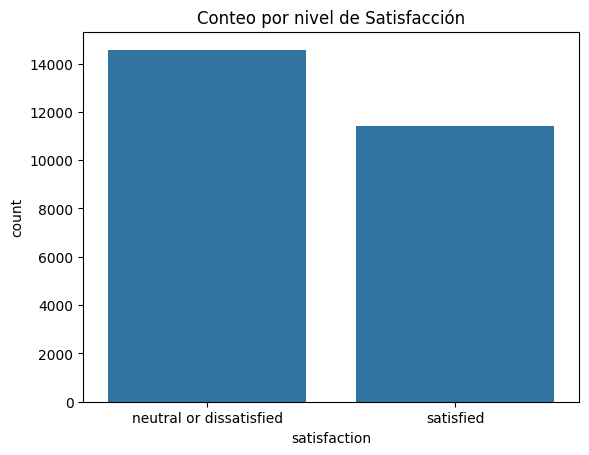


Porcentajes por nivel de satisfacción:


,proportion
satisfaction,
neutral or dissatisfied,0.561
satisfied,0.439


In [8]:
# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Conteo de Satisfacción
sns.countplot(x='satisfaction', data=df, order=df['satisfaction'].value_counts().index)
plt.title('Conteo por nivel de Satisfacción')
plt.show()

print('\nPorcentajes por nivel de satisfacción:')
display(df['satisfaction'].value_counts(normalize=True).round(3))

La gráfica de barras del conteo del Nivel de Satisfacción muestra el número de pasajeros y su nivel de satisfacción:


*   56.1% de los pasajeros están neutral o insatisfechos
*   43.9% de los pasajeros están satisfechos


Esto indica que hay una pequeña mayoría de clientes que no siente satisfacción total, aunque la diferencia no es extrema, sí refleja una oportunidad de mejora para la aerolínea.

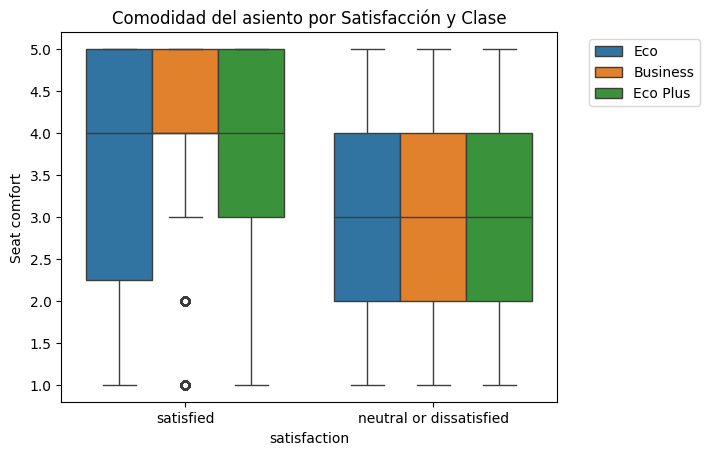

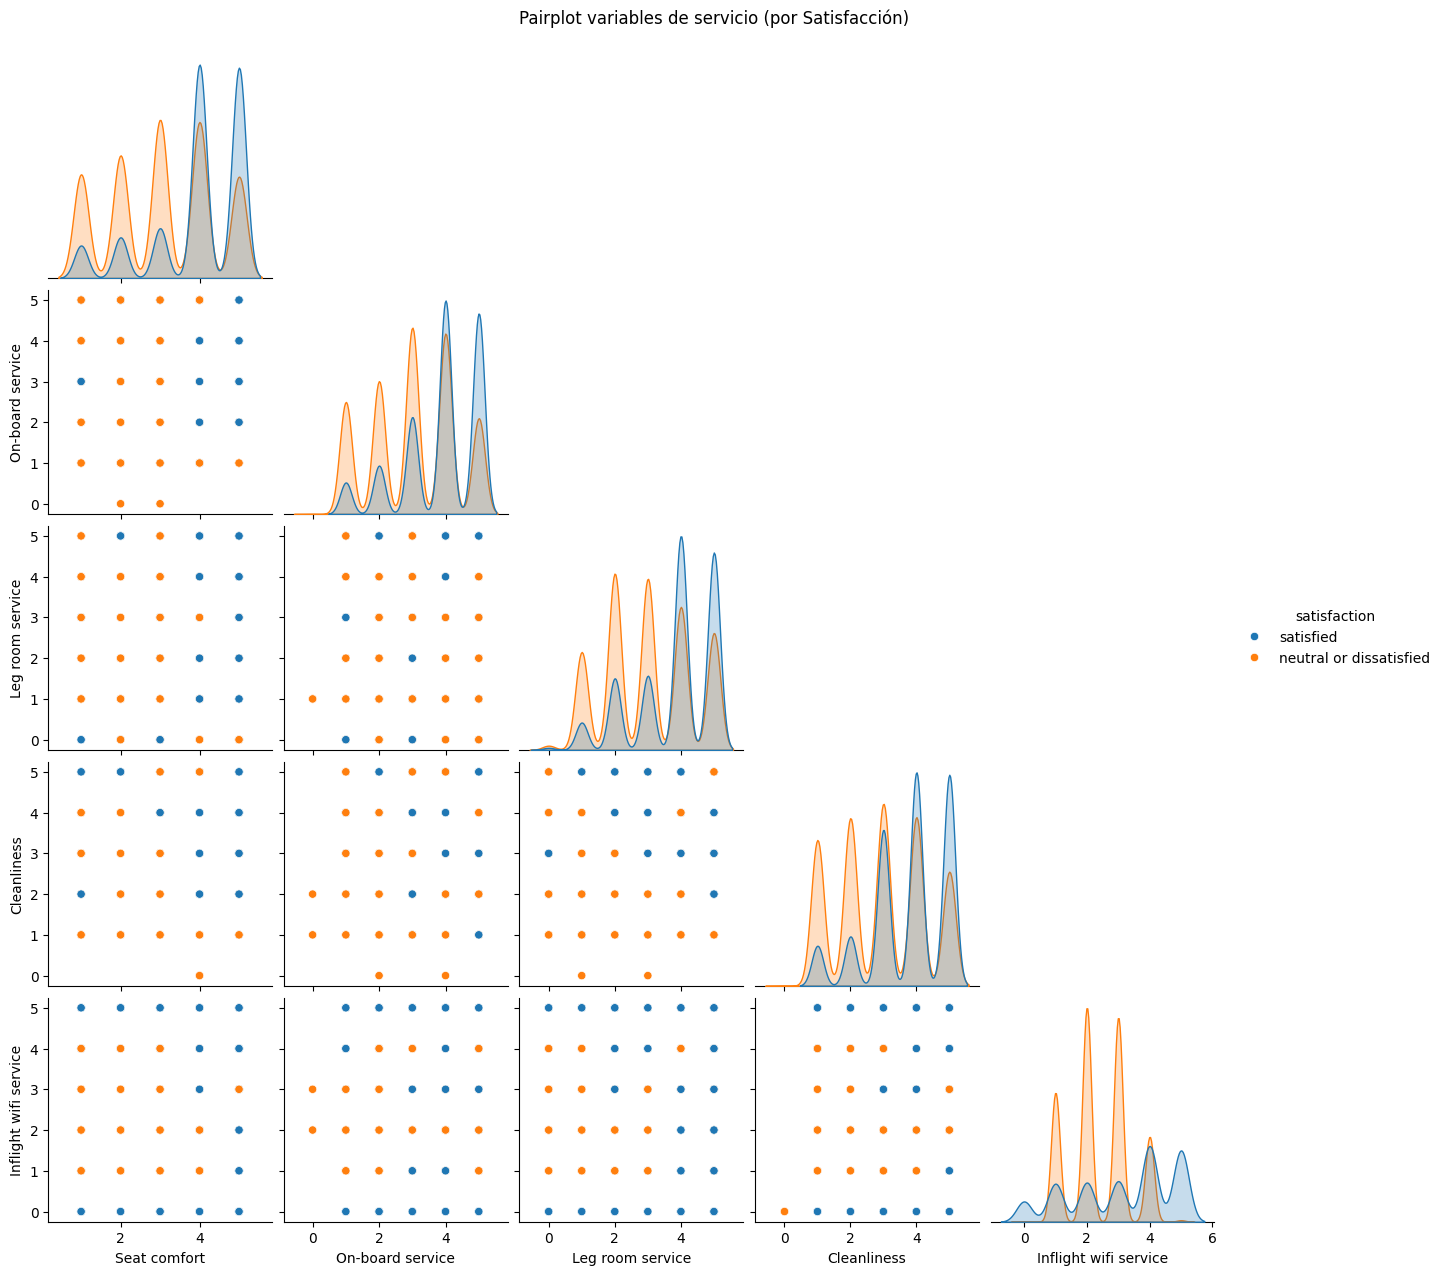

In [9]:
# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Bivariado: Seat comfort vs Satisfaction
sns.boxplot(x='satisfaction', y='Seat comfort', hue='Class', data=df)
plt.title('Comodidad del asiento por Satisfacción y Clase')
plt.legend(loc='upper left', bbox_to_anchor=(1.05,1) )
plt.show()

# Pairwise: Variables de servicio para ver correlaciones
service_cols = ['Seat comfort','On-board service','Leg room service','Cleanliness','Inflight wifi service']
sns.pairplot(df[service_cols + ['satisfaction']].dropna(), hue='satisfaction', corner=True)
plt.suptitle('Pairplot variables de servicio (por Satisfacción)', y=1.02)
plt.show()



In [ ]:

# Resúmenes numéricos para vincular con hipótesis
# 1) Satisfacción por Clase
print('Satisfacción por Class (porcentaje):')
display((df.groupby('Class')['satisfaction'].value_counts(normalize=True).unstack().round(3)))

# 2) Efecto de retraso promedio por satisfacción
print('\nRetrasos promedio por nivel de Satisfaction:')
display(df.groupby('satisfaction')[['Departure Delay in Minutes','Arrival Delay in Minutes']].mean().round(2))

# 3) Media de puntuaciones de servicio por Satisfaction
service_cols = ['Seat comfort','On-board service','Leg room service','Cleanliness']
print('\nPromedio de puntuaciones de servicio por Satisfaction:')
display(df.groupby('satisfaction')[service_cols].mean().round(2))


Satisfacción por Class (porcentaje):


satisfaction,neutral or dissatisfied,satisfied
Class,,
Business,0.305,0.695
Eco,0.806,0.194
Eco Plus,0.752,0.248



Retrasos promedio por nivel de Satisfaction:


,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,
neutral or dissatisfied,16.02,16.77
satisfied,12.12,12.15



Promedio de puntuaciones de servicio por Satisfaction:


,Seat comfort,On-board service,Leg room service,Cleanliness
satisfaction,,,,
neutral or dissatisfied,3.04,3.02,2.99,2.92
satisfied,3.97,3.85,3.81,3.76



## Interpretación gráficos y análisis numéricos  con las hipótesis


- **Clase vs Satisfacción:**
A partir de la tabla de proporciones por Class, se observa que la clase Business tiene la proporción más alta de pasajeros satisfechos, mientras que en Eco y Eco Plus predominan los pasajeros neutrales o insatisfechos.
Esto respalda parcialmente la hipótesis de que una mejor clase de servicio está asociada con un mayor nivel de satisfacción.

  * El boxplot de Seat comfort por Satisfaction y Class complementa este hallazgo: los pasajeros satisfechos tienden a reportar mayor comodidad del asiento en todas las clases, pero especialmente en Business. Esto sugiere que la comodidad del asiento es un factor relevante en la relación entre clase y satisfacción.

- **Retrasos:**
La tabla de retrasos promedio indica que los pasajeros neutrales o insatisfechos presentan mayores tiempos promedio de retraso, tanto en Departure Delay como en Arrival Delay, en comparación con los pasajeros satisfechos.
Esto apoya la hipótesis de que experiencias negativas asociadas a retrasos pueden disminuir la satisfacción.

- **Puntuaciones de servicio**
Los promedios de puntuaciones por nivel de satisfacción muestran un patrón muy claro:
los pasajeros satisfechos tienen puntajes consistentemente más altos en:

    *Seat comfort

    *On-board service

    *Leg room service

    *Cleanliness
